In [1]:
%pip install imutils

Note: you may need to restart the kernel to use updated packages.


Image Stitching

[INFO] stitching images...


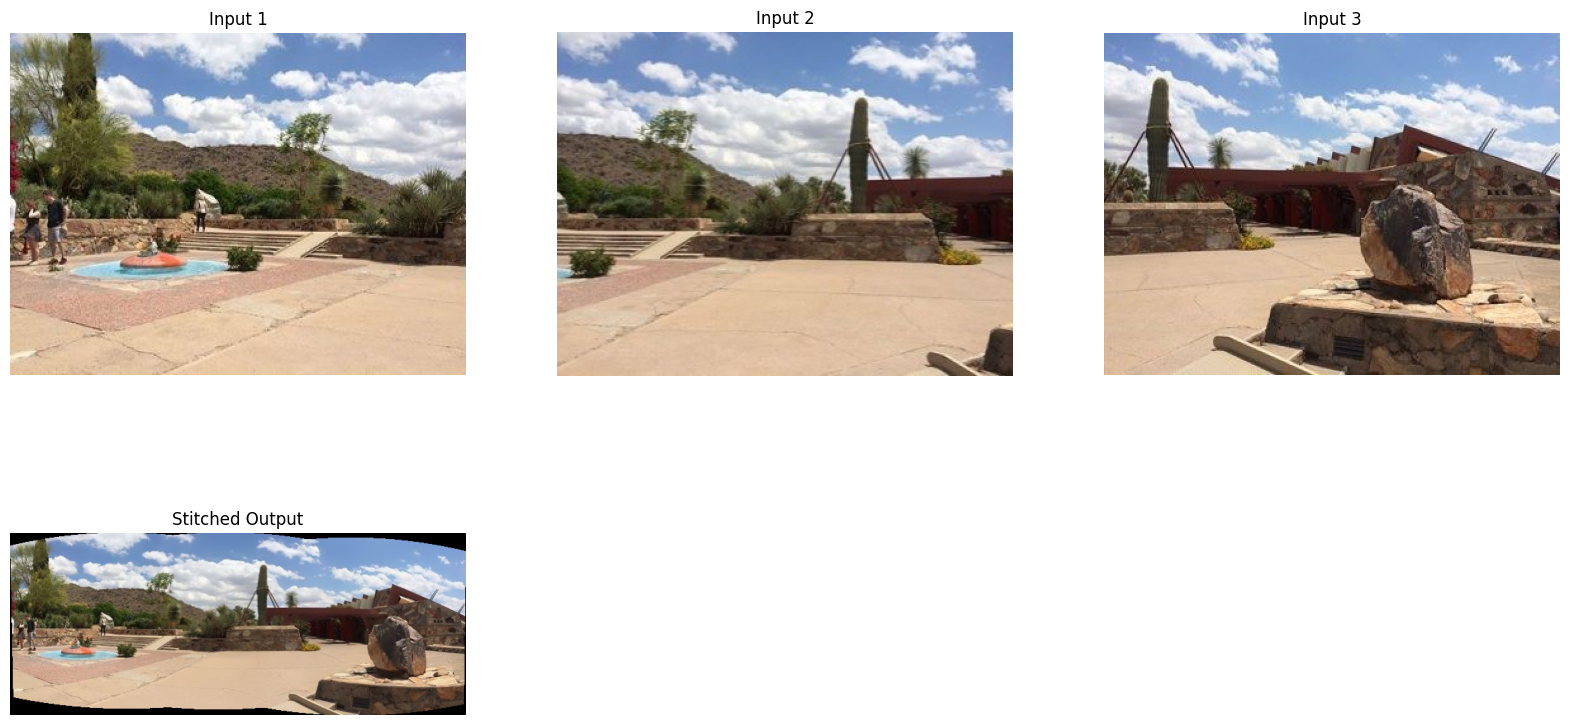

In [8]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def main():
    imagePaths = ["monument1.jpg", "monument2.jpg", "monument3.jpg"]
    images = []

    for imagePath in imagePaths:
        image = cv2.imread(imagePath)
        images.append(image)

    print("[INFO] stitching images...")
    stitcher = cv2.Stitcher_create() 
    (status, stitched) = stitcher.stitch(images)

    if status == cv2.Stitcher_OK:
        fig, axes = plt.subplots(2, len(images), figsize=(20, 10))
        
        for i, imagePath in enumerate(imagePaths):
            img = cv2.imread(imagePath)
            axes[0, i].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
            axes[0, i].set_title(f"Input {i+1}")
            axes[0, i].axis('off')
        
        output_img = cv2.cvtColor(stitched, cv2.COLOR_BGR2RGB)
        axes[1, 0].imshow(output_img)
        axes[1, 0].set_title("Stitched Output")
        axes[1, 0].axis('off')

        for j in range(1, len(images)):
            fig.delaxes(axes[1, j])

        plt.show()

    else:
        print("[INFO] image stitching failed ({})".format(status))

if __name__ == "__main__":
    main()


Dengan brightness yang berbeda-beda

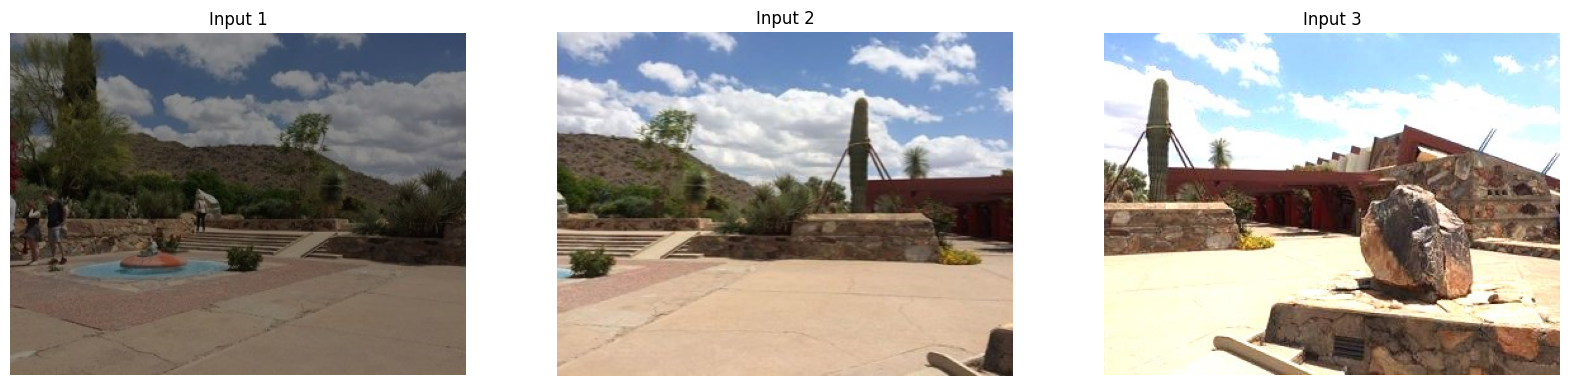

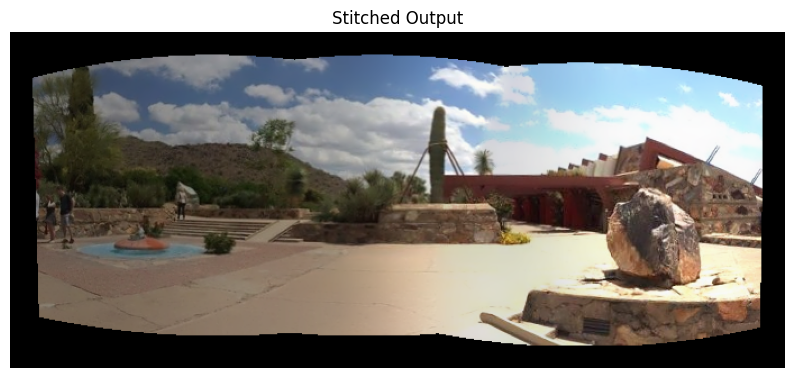

In [7]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def main():
  image_paths = ["monument1-dark.jpg", "monument2-dark.jpg", "monument3-dark.jpg"]

  images = []
  for path in image_paths:
    image = cv2.imread(path)
    if image is None:
      print(f"Error: Failed to load image {path}")
      return
    images.append(image)

  stitcher = cv2.Stitcher_create(mode=cv2.Stitcher_PANORAMA)  # Consider SIFT or ORB

  (status, stitched) = stitcher.stitch(images)

  if status != cv2.Stitcher_OK:
    print("[INFO] Image stitching failed ({})".format(status))
    return

  gray = cv2.cvtColor(stitched, cv2.COLOR_BGR2GRAY)

  gray = cv2.GaussianBlur(gray, (5, 5), 0)

  thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

  contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

  if contours:
    non_black_pixels = np.where(thresh > 0)
    y_min, y_max, x_min, x_max = non_black_pixels[0].min(), non_black_pixels[0].max(), non_black_pixels[1].min(), non_black_pixels[1].max()
    stitched_cropped = stitched[y_min:y_max, x_min:x_max]
  else:
    print("Warning: No contours found. Cropping might not be accurate.")

  border_width = 20  # Adjustable
  stitched_bordered = cv2.copyMakeBorder(stitched_cropped, border_width, border_width, border_width, border_width, cv2.BORDER_CONSTANT, value=(0, 0, 0))

  cv2.imwrite("output.jpg", stitched_bordered)

  fig, axes = plt.subplots(1, len(image_paths), figsize=(20, 6))
  for i, imagePath in enumerate(image_paths):
    img = cv2.imread(imagePath)
    axes[i].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    axes[i].set_title(f"Input {i+1}")
    axes[i].axis('off')

  plt.figure(figsize=(10, 6))
  plt.imshow(cv2.cvtColor(stitched_bordered, cv2.COLOR_BGR2RGB))
  plt.title("Stitched Output")
  plt.axis('off')
  plt.show()

if __name__ == "__main__":
  main()

